# K-Means Clustering - Interactive Visualization

In [1]:
# Import Libraries
import time
from IPython.display import clear_output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn import datasets

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

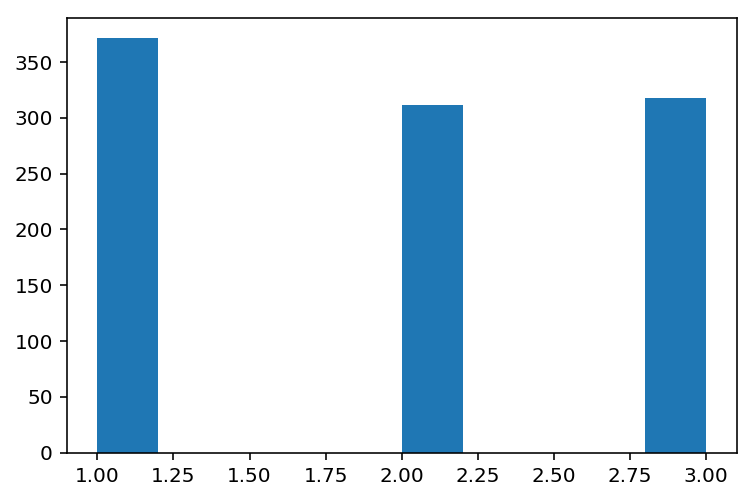

In [8]:
a= np.random.choice([1,2,3], size=1000)
plt.hist(a);

In [52]:
# Kmeans++ Initialization
k = 3
indices = list(range(X.shape[0]))
centroids = np.empty((k,2))
centroids[0, :] = X[np.random.choice(indices), :]
D = np.power(np.linalg.norm(X-centroids[0], axis=1), 2)
P = D/D.sum()

for i in range(k-1):
    centroidIdx = np.random.choice(indices, size=1, p=P)
    centroids[i+1, :] = X[centroidIdx, :]
    Dtemp = np.power(np.linalg.norm(X-centroids[-1, :], axis=1), 2)
    D = np.min(np.vstack((Dtemp, D)), axis=0)
    P = D/D.sum()


In [37]:

centroids

array([[ 8.8481048 ,  5.61842189],
       [-8.64839665, -7.27611338],
       [ 8.48798578, -5.79179966]])

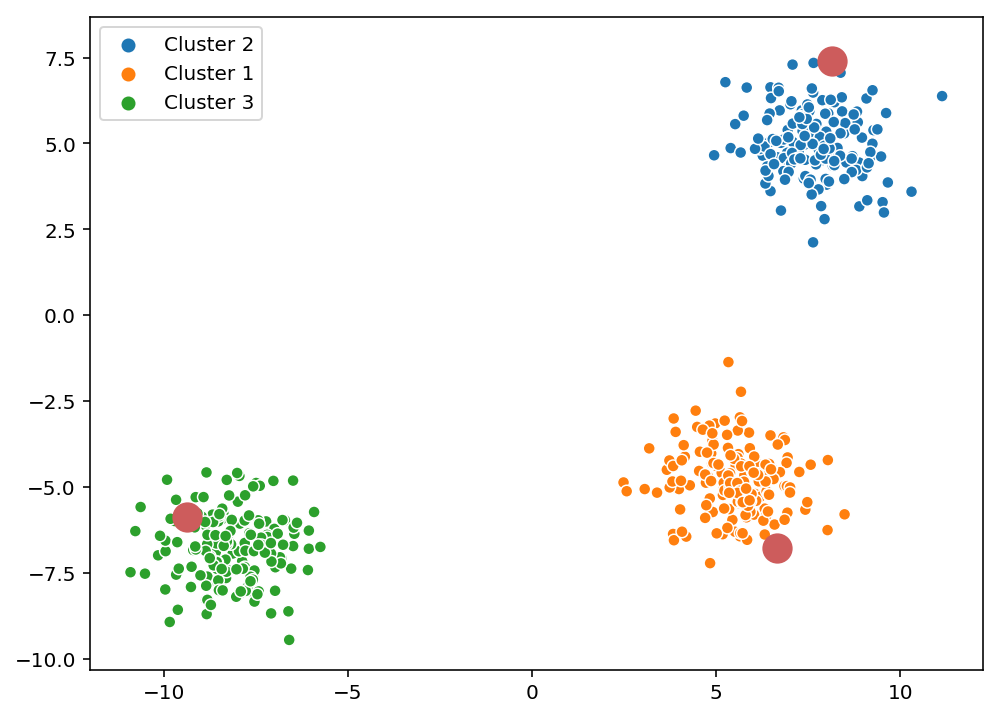

In [53]:
clusterEncoding = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4:'Cluster 5', 5:'Cluster 6'}
#X, y = make_blobs(n_samples=500)




plt.figure(figsize=(8,6))
sns.scatterplot(X[:,0], X[:,1], hue=list(map(clusterEncoding.get, y)))
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='indianred');

In [141]:
def create_dataset(shape='gmm', sampleSize=200, n_clusters=3):
    clusterStd = [0.5, 1, 2]*3
    clusterStd = clusterStd[:n_clusters]
    
    if shape=='gmm':
        X = datasets.make_blobs(n_samples=sampleSize, n_features=2, centers=n_clusters, cluster_std=clusterStd)[0]
        X[:,0] = 30*(X[:,0]-min(X[:,0]))/(max(X[:,0])-min(X[:,0])) - 15
        X[:,1] = 30*(X[:,1]-min(X[:,1]))/(max(X[:,1])-min(X[:,1])) - 15
        
    elif shape=='circle':
        X = 15*datasets.make_circles(n_samples=sampleSize, factor=.5, noise=.05)[0]
        
    elif shape=='moon':
        X = datasets.make_moons(n_samples=sampleSize, noise=.1)[0]
        X[:,0] = 30*(X[:,0]-min(X[:,0]))/(max(X[:,0])-min(X[:,0])) - 15
        X[:,1] = 30*(X[:,1]-min(X[:,1]))/(max(X[:,1])-min(X[:,1])) - 15       

    elif shape=='anisotropic':
        transformations = {0:[[0.6, -0.6], [-0.4, 0.8]], 1:[[-0.7, -0.6], [0.6, 0.8]], 2:[[0.8, -0.1], [0.8, 0.1]]}
        X, y = datasets.make_blobs(n_samples=sampleSize, n_features=2, centers=n_clusters, cluster_std=clusterStd)
        for i in range(n_clusters):
            X[y==i] = np.dot(X[y==i], transformations[i%3])
        X = 5*X
        X[:,0] = 30*(X[:,0]-min(X[:,0]))/(max(X[:,0])-min(X[:,0])) - 15
        X[:,1] = 30*(X[:,1]-min(X[:,1]))/(max(X[:,1])-min(X[:,1])) - 15
    else:
        X = 30*np.random.rand(sampleSize, 2)-15
        
    return X


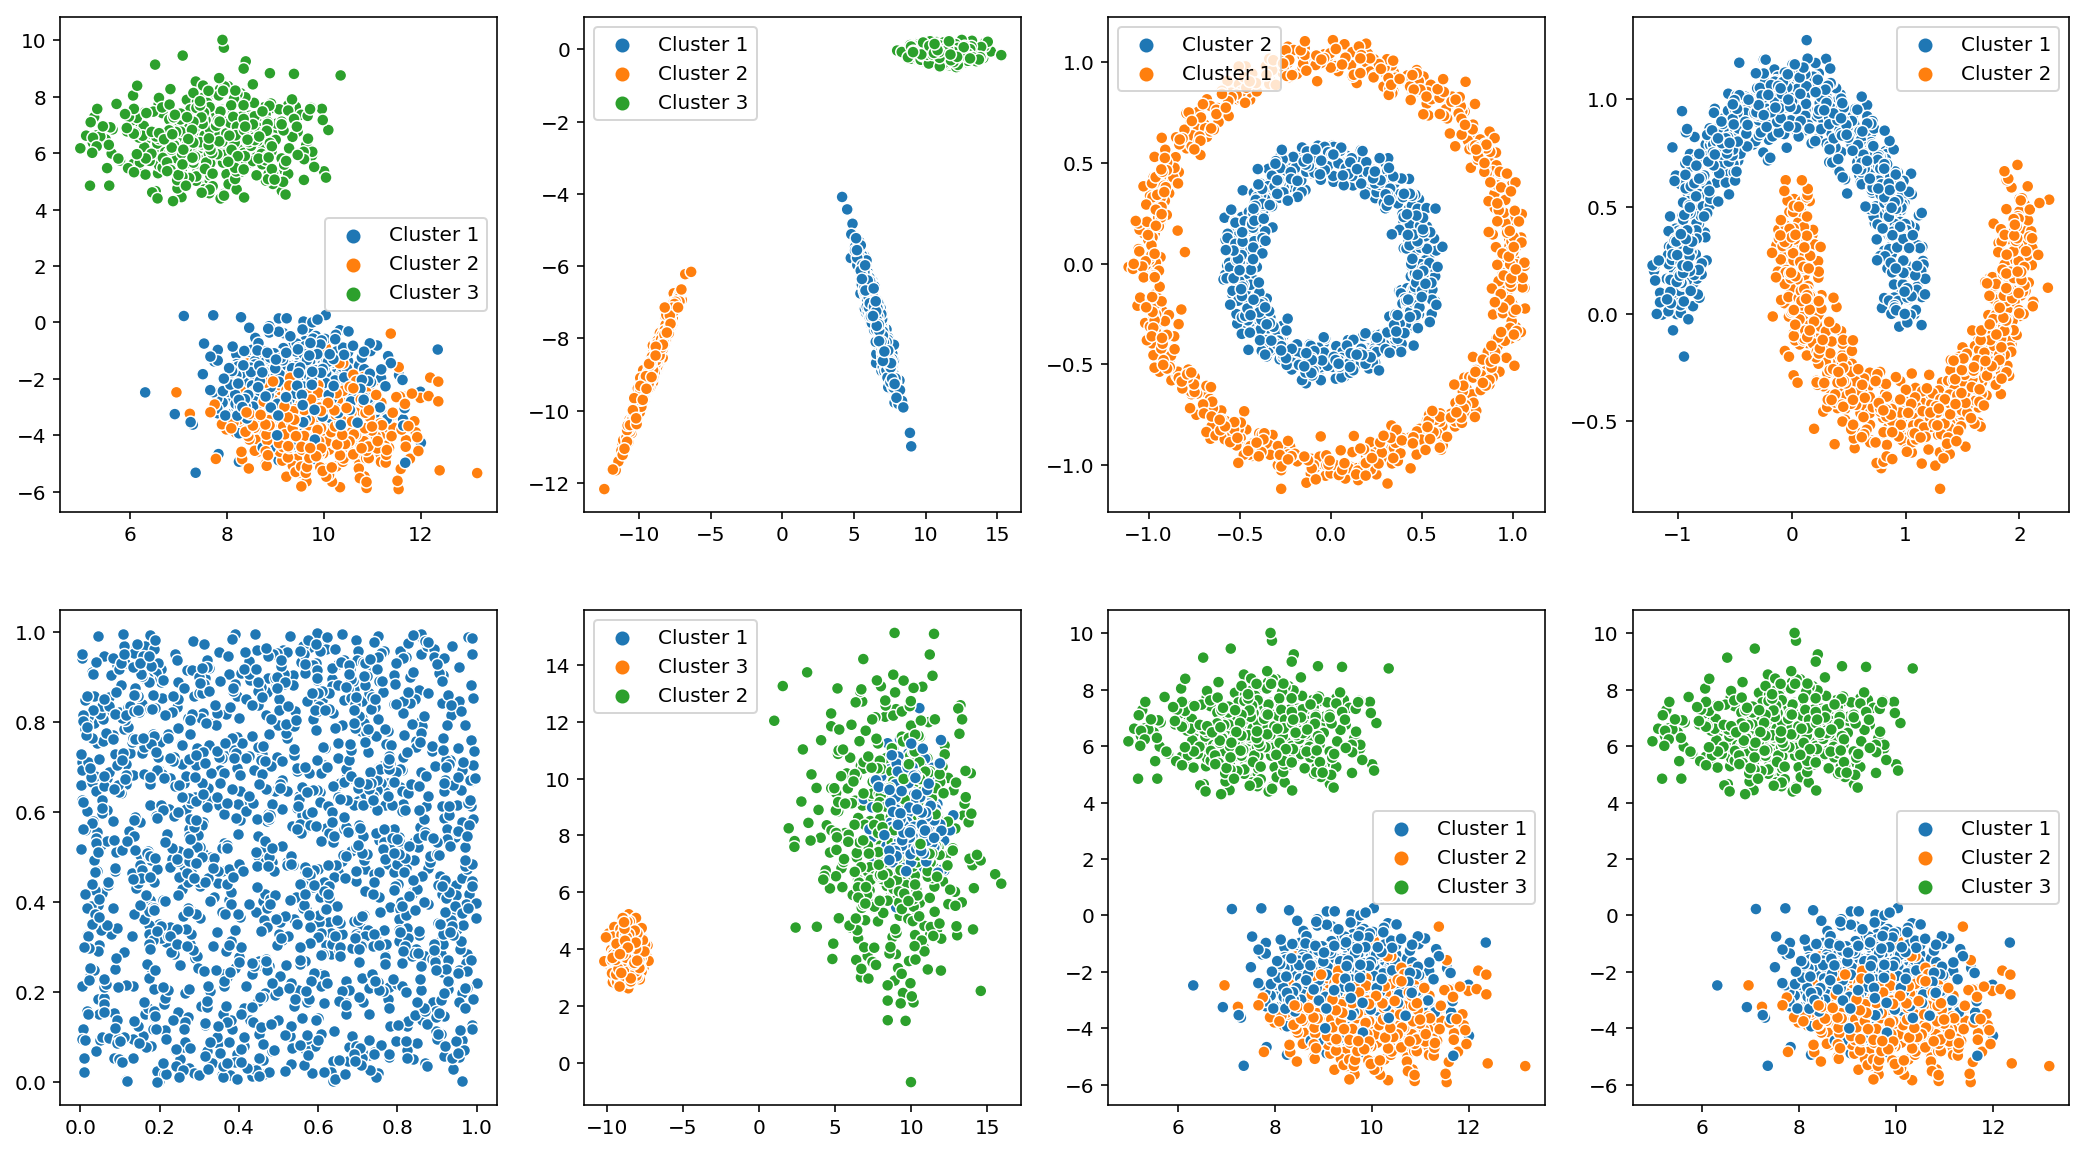

In [59]:
# Create Dataset
clusterEncoding = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'}

#nSamples = 250
#nCenters = 4
#clusterStd = [1, 1, 1, 1]
#X, y = make_blobs(n_samples=nSamples, n_features=2, centers=nCenters, cluster_std=clusterStd)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.1)
blobs = datasets.make_blobs(n_samples=n_samples)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples)
transformation0 = [[0.6, -0.6], [-0.4, 0.8]]
transformation1 = [[-0.7, -0.6], [0.6, 0.8]]
transformation2 = [[0.8, -0.1], [0.8, 0.1]]
X_aniso = X.copy()
X_aniso[y==0] = np.dot(X_aniso[y==0], transformation0)
X_aniso[y==1] = np.dot(X_aniso[y==1], transformation1)
X_aniso[y==2] = np.dot(X_aniso[y==2], transformation2)



aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5])

plt.figure(figsize=(18,10))
plt.subplot(2,4,1)
sns.scatterplot(X[:,0], X[:,1], hue=list(map(clusterEncoding.get, y)))

plt.subplot(2,4,2)
sns.scatterplot(X_aniso[:,0], X_aniso[:,1], hue=list(map(clusterEncoding.get, y)))

plt.subplot(2,4,3)
sns.scatterplot(noisy_circles[0][:,0], noisy_circles[0][:,1], hue=list(map(clusterEncoding.get, noisy_circles[1])))

plt.subplot(2,4,4)
sns.scatterplot(noisy_moons[0][:,0], noisy_moons[0][:,1], hue=list(map(clusterEncoding.get, noisy_moons[1])))

plt.subplot(2,4,5)
sns.scatterplot(no_structure[0][:,0], no_structure[0][:,1])

plt.subplot(2,4,6)
sns.scatterplot(varied[0][:,0], varied[0][:,1], hue=list(map(clusterEncoding.get, varied[1])))

plt.subplot(2,4,7)
sns.scatterplot(X[:,0], X[:,1], hue=list(map(clusterEncoding.get, y)))

plt.subplot(2,4,8)
sns.scatterplot(X[:,0], X[:,1], hue=list(map(clusterEncoding.get, y)));

In [228]:
# Run K-means
km = KMeans(n_clusters=nCenters).fit(X)

# Build Grid
xmin = min(X[:,0])-1
xmax = max(X[:,0])+1
ymin = min(X[:,1])-1
ymax = max(X[:,1])+1
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
grid = np.vstack((xx.flatten(), yy.flatten())).T

# Predict
predGrid = km.predict(grid)

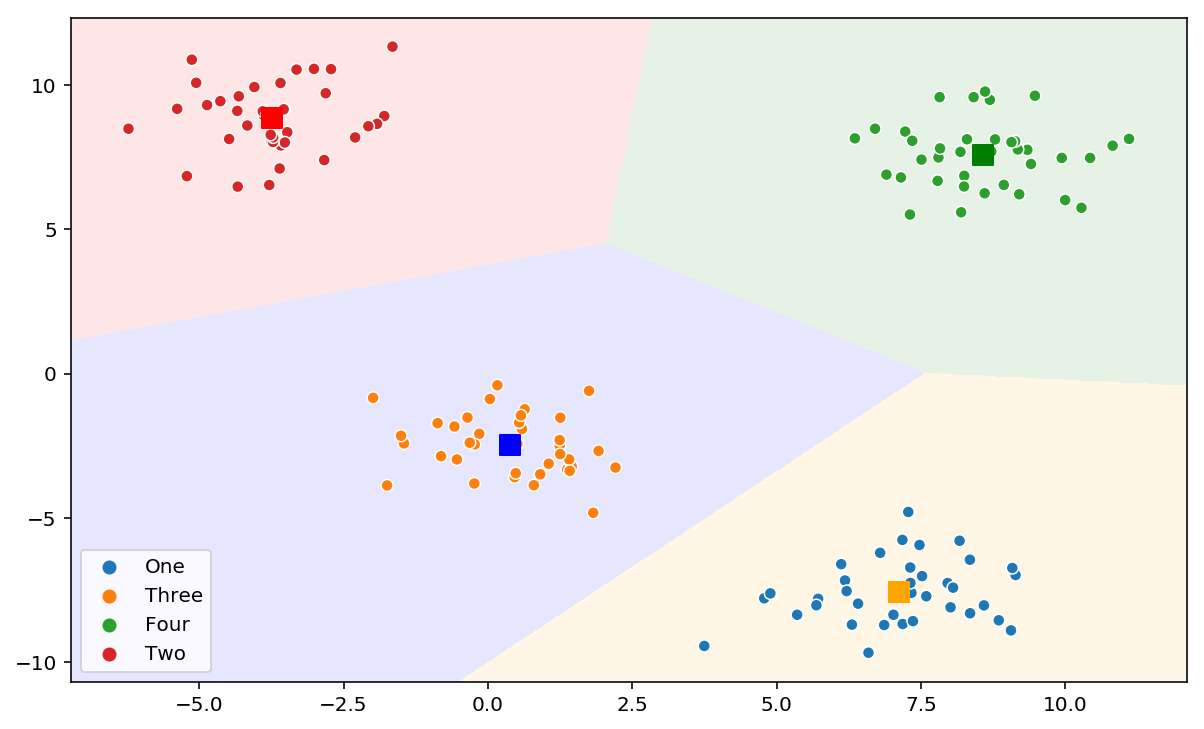

In [229]:
# Visualize K-means
plt.figure(figsize=(10,10))

# make a color map of fixed colors
cmap = colors.ListedColormap(['b', 'g', 'r', 'orange'])
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
plt.imshow(predGrid.reshape(1000,1000), alpha=.1, interpolation='nearest', 
                 origin='lower', cmap=cmap, norm=norm, extent=[xmin,xmax,ymin,ymax], aspect=.5, )
yt = ['One' if i==0 else 'Two' if i==1 else 'Three' if i==2 else 'Four'  for i in y]
sns.scatterplot(x=X[:,0], y=X[:,1], hue=yt)
plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], marker='s', s=100, c=['b', 'g', 'r', 'orange']);


In [3]:
# Distance Function
def dist(pointA, pointB, order=None):
    return np.linalg.norm(pointA-pointB, ord=order)

# Centroid Initialization Function
def init_centroids(k=3):
    return 20*np.random.rand(k, 2)-10

# K-means Expectation Step Function
def Kmeans_EStep(X, centroids):
    k = centroids.shape[0]
    # Initialize Points-Centroid Distance Matrix
    centroidDistMat = np.empty((X.shape[0], k))

    # Compute Points-Centroid Distance Matrix
    for i in range(k):
        centroidDistMat[:, i] = np.linalg.norm(X-centroids[i,:], axis=1)
    
    # Infer Labels
    labels = centroidDistMat.argmin(axis=1)
    
    return labels

# K-means Maximization Step Function
def Kmeans_MStep(X, labels, k):
    # Initialize New Centroids
    centroids = np.empty((k, 2))
    # Compute Values for New Centroids
    for i in range(k):
        if sum(labels==i)>0:
            centroids[i, :] = X[labels==i, :].mean(axis=0)
    
    return centroids
    

In [7]:
clusterEncoding = {0:'red', 1:'blue', 2:'orange', 3:'green'}
#clusterEncoding = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'}
labelsEncoded = list(map(clusterEncoding.get, labels))

data = []
# Compute Array
for clus in range(k):
    centroidPoints = X[labels==clus, :]
    for i in range(1, 3*centroidPoints.shape[0], 3):
        centroidPoints=np.insert(centroidPoints, i, centroids[clus, :], axis=0)
        centroidPoints=np.insert(centroidPoints, i+1, np.array([None, None]), axis=0)
    
    # Create Centroid-Points Trace
    traceCentroidPoints = go.Scatter(
                                x = centroidPoints[:, 0],
                                y = centroidPoints[:, 1],
                                mode = 'markers+lines',
                                line = dict(color='silver', width=.5),
                                marker = dict(color=clusterEncoding[clus], line = dict(width=1, color='white')),
                                name = 'Cluster {}'.format(clus+1)
    )
    data.append(traceCentroidPoints)
    
    # Create Centroid Trace
    traceCentroid = go.Scatter(
                    x = [centroids[clus, 0]],
                    y = [centroids[clus, 1]],
                    name = 'Centroid {}'.format(clus+1),
                    mode='markers',
                    marker = dict(size=20, symbol='circle', color=clusterEncoding[clus], line = dict(width=3, color='black'))
    )
    data.append(traceCentroid)



# Create Layout
layout = dict(
        title = 'K-means : Final State',
        xaxis = dict(zeroline=False, showgrid=False, showline=True, linecolor='black', linewidth=2,  mirror='ticks', title='X1'),
        yaxis = dict(zeroline=False, showgrid=False, showline=True, linecolor='black', linewidth=2,  mirror='ticks', title='X2')
)


# Plot and embed in ipython notebook!
fig = dict(data=data, layout=layout)
iplot(fig, filename='Kmeans-scatter')

In [187]:
# Visualize K-Means Function
clusColorEncoding = {0:'red', 1:'blue', 2:'orange', 3:'green'}
clusLabelEncoding = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'}
lineColors = {0: 'rgba(255, 0, 0, .4)', 1: 'rgba(0, 0, 255, .4)', 
              2: 'rgba(255, 165, 0, .4)', 3: 'rgba(0, 255, 0, .4)'}

def visualize_kmeans(X, labels, centroids, title=None, k=3):
    clusColorEncoding = {0:'red', 1:'blue', 2:'orange', 3:'green'}
    clusLabelEncoding = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'}
    clusLabelColors = list(map(clusterEncoding.get, labels))

    data = []
    
    if sum(labels) == -X.shape[0]:
        tracePoints = go.Scatter(
            x = X[:, 0],
            y = X[:, 1],
            mode = 'markers',
            name = 'Data Points',
            marker = dict(color='gray')
        )
        for clusNum in range(k):
            data.append(tracePoints)
            traceCentroids = go.Scatter(
                                x = [centroids[clusNum, 0]],
                                y = [centroids[clusNum, 1]],
                                mode = 'markers',
                                name = 'Centroid {}'.format(clusNum+1),
                                marker = dict(size=15, symbol='circle', color=clusColorEncoding[clusNum], 
                                              opacity=.7, line = dict(width=3, color='black'))
            )
            data.append(traceCentroids)
        return data
    
    for clusNum in range(k):

        ## FIRST TRACE TYPE : DATA POINTS
        tracePoints = go.Scatter(
                        x = X[labels==clusNum, 0],
                        y = X[labels==clusNum, 1],
                        mode = 'markers',
                        marker = dict(color=clusColorEncoding[clusNum], line = dict(width=1, color='white')),
                        name = 'Cluster {}'.format(clusNum+1)
        )
        data.append(tracePoints)
        
        ## SECOND TRACE TYPE : LINES BETWEEN DATA POINTS AND CENTROIDS
            # Compute Array with Nones to link centroids to their respective points with lines
        centroidPoints = X[labels==clusNum, :]
        for i in range(1, 3*centroidPoints.shape[0], 3):
            centroidPoints = np.insert(centroidPoints, i, centroids[clusNum, :], axis=0)
            centroidPoints = np.insert(centroidPoints, i+1, np.array([None, None]), axis=0)

            # Trace Lines
        traceLines = go.Scatter(
                        x = centroidPoints[:, 0],
                        y = centroidPoints[:, 1],
                        mode = 'lines',
                        line = dict(color=lineColors[clusNum], width=.5),
                        name = 'Cluster Line {}'.format(clusNum+1)
        )
        data.append(traceLines)

        ## THIRD TRACE TYPE : CENTROIDS
        traceCentroid = go.Scatter(
                        x = [centroids[clusNum, 0]],
                        y = [centroids[clusNum, 1]],
                        name = 'Centroid {}'.format(clusNum+1),
                        mode='markers',
                        marker = dict(size=15, symbol='circle', color=clusColorEncoding[clusNum], opacity=.7,
                                      line = dict(width=3, color='black'))
        )
        data.append(traceCentroid)
        

    # Create Layout
    layout = dict(
            title = title,
            xaxis = dict(zeroline=False, showgrid=False, showline=True, linecolor='black', linewidth=2,  mirror='ticks', title='X1'),
            yaxis = dict(zeroline=False, showgrid=False, showline=True, linecolor='black', linewidth=2,  mirror='ticks', title='X2')
    )


    # Plot and embed in ipython notebook!
    fig = dict(data=data, layout=layout)
    #iplot(fig, filename='Kmeans-scatter')
    return data

In [267]:
# Make K-means data
def make_kmeans_data(X, labels, centroids):
    clusColorEncoding = {0:'red', 1:'blue', 2:'orange', 3:'green'}
    clusLabelEncoding = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'}
    clusLabelColors = list(map(clusterEncoding.get, labels))
    
    # Num Clusters
    k = centroids.shape[0]

    data = []
    
    if sum(labels)==-X.shape[0]:
        # Data Points
        tracePoints = go.Scatter(
                    x = X[:, 0],
                    y = X[:, 1],
                    mode = 'markers',
                    marker = dict(color='gray', 
                                  line = dict(width=1, color='white')),
                    name = 'Data Points'
        )
        data.append(tracePoints)
        # Centroid-Point Lines
        centroidPoints = X.copy()
        for idx,i in enumerate(range(1, 3*centroidPoints.shape[0], 3)):
            centroidPoints = np.insert(centroidPoints, i, X.mean(axis=0), axis=0)
            centroidPoints = np.insert(centroidPoints, i+1, np.array([None, None]), axis=0)
        traceLines = go.Scatter(
                        x = centroidPoints[:, 0],
                        y = centroidPoints[:, 1],
                        mode = 'lines',
                        line = dict(color='silver', width=.5),
                        name = 'Cluster Lines'
        )
        data.append(traceLines)
        # Centroids
        traceCentroid = go.Scatter(
                        x = centroids[:, 0],
                        y = centroids[:, 1],
                        name = 'Centroids',
                        mode='markers',
                        marker = dict(color='gray', 
                                      size=15, symbol='circle', opacity=.7, line = dict(width=3, color='black'))
        )
        data.append(traceCentroid)
        return data
    
    ## FIRST TRACE TYPE : DATA POINTS
    tracePoints = go.Scatter(
                    x = X[:, 0],
                    y = X[:, 1],
                    mode = 'markers',
                    marker = dict(color=[clusColorEncoding[i] for i in labels], 
                                  line = dict(width=1, color='white')),
                    name = 'Data Points'
    )
    data.append(tracePoints)

    ## SECOND TRACE TYPE : LINES BETWEEN DATA POINTS AND CENTROIDS
        # Compute Array with Nones to link centroids to their respective points with lines
    centroidPoints = X.copy()
    for idx,i in enumerate(range(1, 3*centroidPoints.shape[0], 3)):
        centroidPoints = np.insert(centroidPoints, i, centroids[labels[idx], :], axis=0)
        centroidPoints = np.insert(centroidPoints, i+1, np.array([None, None]), axis=0)

        # Trace Lines
    traceLines = go.Scatter(
                    x = centroidPoints[:, 0],
                    y = centroidPoints[:, 1],
                    mode = 'lines',
                    line = dict(color='silver', width=.5),
                    name = 'Cluster Lines'
    )
    data.append(traceLines)
    
    ## THIRD TRACE TYPE : CENTROIDS
    traceCentroid = go.Scatter(
                        x = centroids[:, 0],
                        y = centroids[:, 1],
                        name = 'Centroids',
                        mode='markers',
                        marker = dict(color=list(clusColorEncoding.values()), 
                                      size=15, symbol='circle', opacity=.7, line = dict(width=3, color='black'))
    )
    data.append(traceCentroid)

    return data
    

In [268]:
# Run Kmeans Plotly

# Create Dataset
nSamples = 250
nCenters = 4
clusterStd = [1, 2, 1, 2]
X, y = make_blobs(n_samples=nSamples, n_features=2, centers=nCenters, cluster_std=clusterStd)

# Create Grid
plotStep = 0.05
xmin = min(X[:,0])-1
xmax = max(X[:,0])+1
ymin = min(X[:,1])-1
ymax = max(X[:,1])+1
x_ = np.arange(xmin, xmax, plotStep)
y_ = np.arange(ymin, ymax, plotStep)
xx, yy = np.meshgrid(x_, y_)
grid = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))

# Initialize Parameters
k = 4
centroids = init_centroids(k)
labels = [-1]*X.shape[0]
#gridLabels = np.empty(grid.shape[0],1)
max_iter = 10

labels_hist = [labels]
centroids_hist = [centroids]
data_hist = []

data_hist.append(make_kmeans_data(X, labels, centroids))
for i in range(max_iter):
    # Expectation Step
    labels =   Kmeans_EStep(X, centroids)
    labels_hist.append(labels)
    centroids_hist.append(centroids)
    data_hist.append(make_kmeans_data(X, labels, centroids))
    #time.sleep(3)
    # Maximization Step
    centroids = Kmeans_MStep(X, labels, k)
    labels_hist.append(labels)
    centroids_hist.append(centroids)
    #clear_output()
    data_hist.append(make_kmeans_data(X, labels, centroids))
    #time.sleep(3)
    #clear_output()

In [ ]:
# ANIMATION
    # FRAMES
frames = [{'data':d, 'layout':{'title':'Step {} : {}'.format(idx//2+1, 'Expectation')}} if idx%2==0  
          else {'data':d, 'layout':{'title':'Step {} : {}'.format(idx//2+1, 'Maximization')}}
          for idx,d in enumerate(data_hist[1:])]
    # INITIAL FRAME
data = data_hist[0]
    # LAYOUT
layout = dict(
    title = 'Initialization',
    xaxis = dict(zeroline=False, showgrid=False, showline=True, linecolor='black', linewidth=2,  mirror='ticks', title='X1'),
    yaxis = dict(zeroline=False, showgrid=False, showline=True, linecolor='black', linewidth=2,  mirror='ticks', title='X2'),
    updatemenus = [{'type': 'buttons',
                    'active': 0,
                    #'executeoninitialization': True,
                    'buttons': [{'label': 'Play', 'method': 'animate', 
                                 'args': [None, dict(frame=dict(duration=1000, redraw=False), 
                                                     fromcurrent=True,
                                                     transition=dict(duration=500))
                                         ]
                                },
                                {
                                'label': 'Pause',
                                'args': [[None], dict(frame=dict(duration=0, redraw=False), mode='immediate', 
                                                      transition=dict(duration=0))],
                                'method': 'animate'
                                }
                               ]
                   }]
)

figure = dict(data=data, layout=layout, frames=frames)
iplot(figure, 'Interactive Kmeans')

In [57]:
# Build Grid
plotStep = 0.05
xmin = min(X[:,0])-1
xmax = max(X[:,0])+1
ymin = min(X[:,1])-1
ymax = max(X[:,1])+1
x_ = np.arange(xmin, xmax, plotStep)
y_ = np.arange(ymin, ymax, plotStep)
xx, yy = np.meshgrid(x_, y_)
grid = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))

gridLabels = Kmeans_EStep(grid, centroids)

In [72]:
# Visualize Predicted Grid
data = [
    go.Heatmap(
        x = x_,
        y = y_,
        z = gridLabels.reshape(xx.shape),
        colorscale = [[0, clusColorEncoding[0]], 
                      [0.33, clusColorEncoding[1]], 
                      [0.66, clusColorEncoding[2]], 
                      [1, clusColorEncoding[3]]],
        opacity=.1,
        showscale=False
    )
]
iplot(data)

In [127]:
# Trace
data = []
for clusNum in range(k):
    tracePoints = go.Scatter(
                    x = X[labels==clusNum, 0],
                    y = X[labels==clusNum, 1],
                    mode = 'markers',
                    marker = dict(color=clusColorEncoding[clusNum], line = dict(width=1, color='white')),
                    name = 'Cluster {}'.format(clusNum+1)
    )
    data.append(tracePoints)

for clusNum in range(k):
    
    # Compute Array with Nones to link centroids to their respective points with lines
    centroidPoints = X[labels==clusNum, :]
    for i in range(1, 3*centroidPoints.shape[0], 3):
        centroidPoints = np.insert(centroidPoints, i, centroids[clusNum, :], axis=0)
        centroidPoints = np.insert(centroidPoints, i+1, np.array([None, None]), axis=0)
    
    # Trace
    traceLines = go.Scatter(
                    x = centroidPoints[:, 0],
                    y = centroidPoints[:, 1],
                    mode = 'lines',
                    line = dict(color=lineColors[clusNum], width=.5),
                    name = 'Cluster Line {}'.format(clusNum+1)
    )
    data.append(traceLines)


iplot(data, 'fifig')


In [3]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
import matplotlib.cm as cm

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


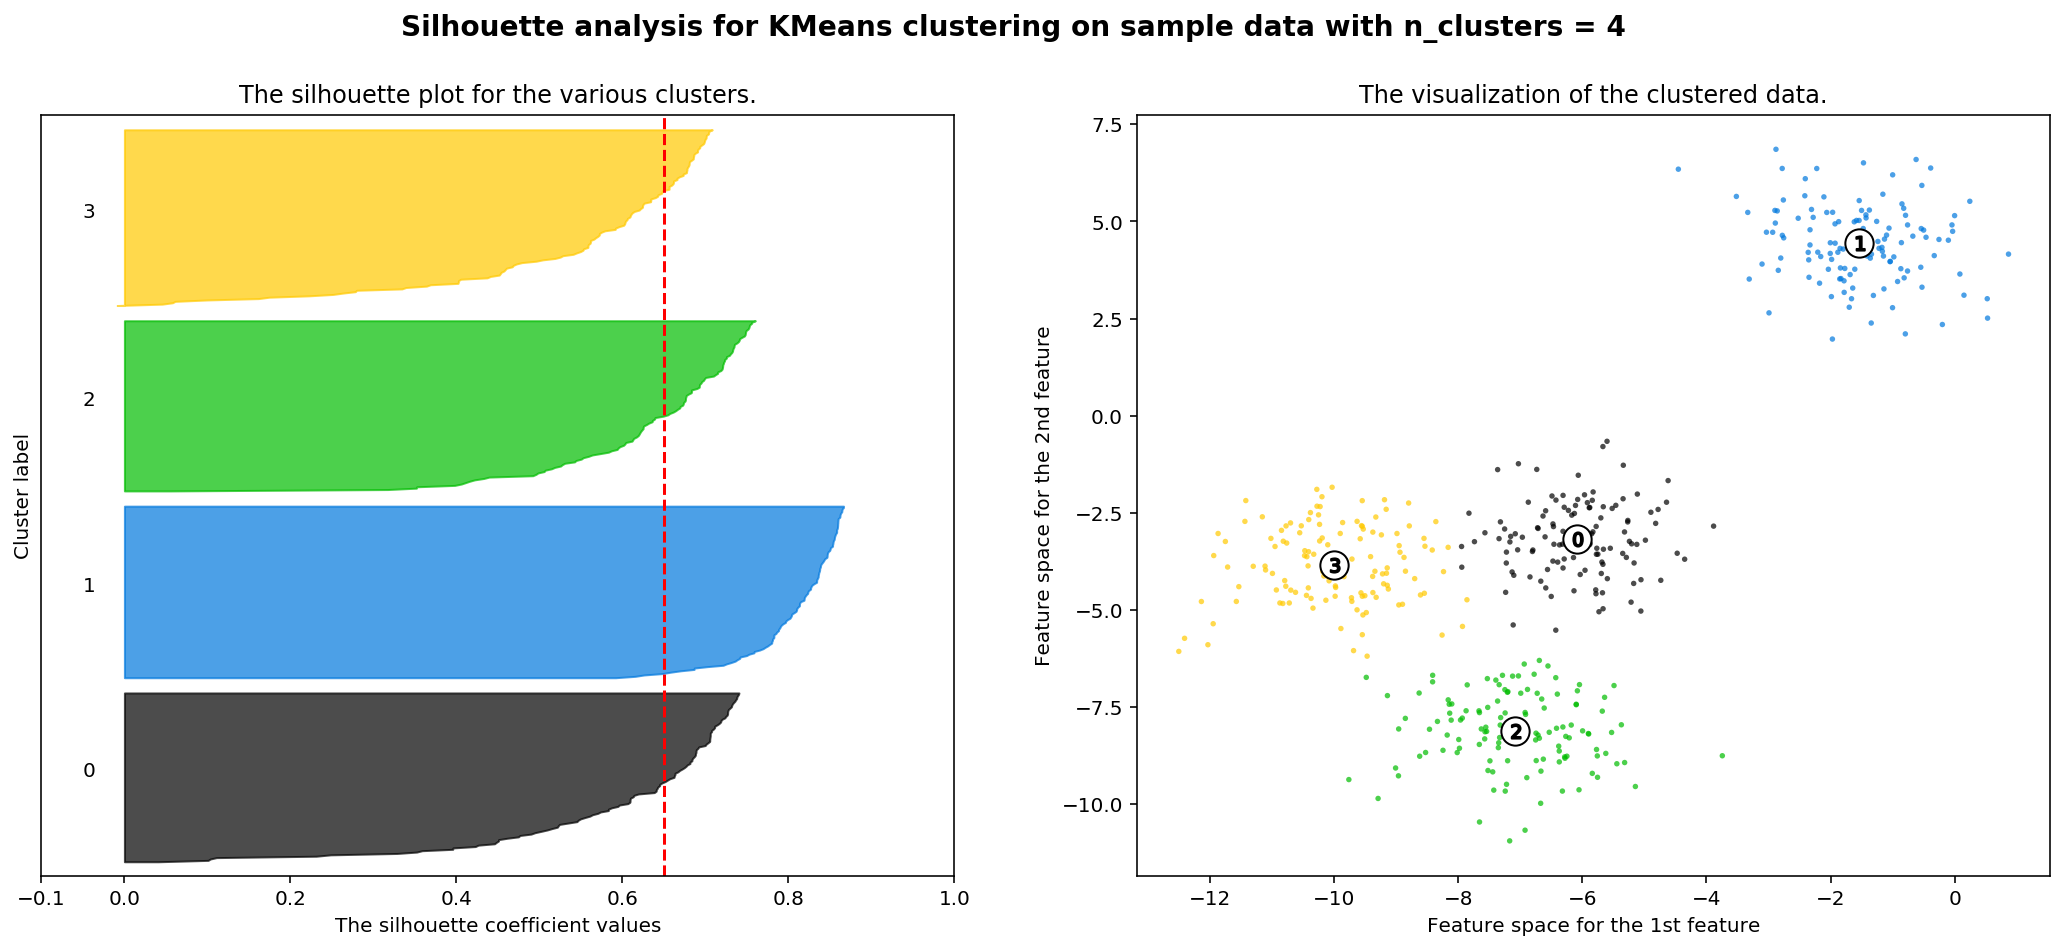

In [4]:
n_clusters = 4

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold');

In [5]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
filled_area = go.Scatter(y=np.arange(10, 10+ith_cluster_silhouette_values.shape[0]),
                         x=ith_cluster_silhouette_values,
                         mode='lines',
                         showlegend=False,
                         line=dict(width=0.5,
                                  ),
                         fill='tozerox')

filled_area2 = go.Scatter(y=np.arange(20+ith_cluster_silhouette_values.shape[0], 20+2*ith_cluster_silhouette_values.shape[0]),
                         x=ith_cluster_silhouette_values,
                         mode='lines',
                         showlegend=False,
                         line=dict(width=0.5,
                                  ),
                         fill='tozerox')

iplot([filled_area, filled_area2], 'fff')

In [6]:
ith_cluster_silhouette_values

array([-0.00872469,  0.04572313,  0.0580048 ,  0.06107484,  0.09916002,
        0.1616137 ,  0.17436228,  0.22262977,  0.25131282,  0.26344224,
        0.27823309,  0.27971801,  0.33436413,  0.33911487,  0.36389608,
        0.3687021 ,  0.40186669,  0.40235979,  0.40251287,  0.40527851,
        0.43701433,  0.44089877,  0.45158542,  0.45282563,  0.45393636,
        0.457298  ,  0.45878499,  0.46029756,  0.46727706,  0.4684146 ,
        0.47212927,  0.47873982,  0.49589762,  0.50398148,  0.51861029,
        0.52509653,  0.5281381 ,  0.5406262 ,  0.54461604,  0.54954225,
        0.55248873,  0.55319783,  0.55834047,  0.5583992 ,  0.55881958,
        0.56105932,  0.56153618,  0.5615834 ,  0.56564538,  0.56768711,
        0.57031198,  0.57213237,  0.5721739 ,  0.57474922,  0.57891472,
        0.59119905,  0.59179481,  0.59583965,  0.60145867,  0.60263048,
        0.6030924 ,  0.60369516,  0.60546734,  0.60606649,  0.6090255 ,
        0.60955615,  0.61042964,  0.61180346,  0.61434083,  0.62

In [200]:
inertias = []
centroids = []
for m in range(2, 11):
    km = KMeans(n_clusters=m).fit(X)
    inertias.append(km.inertia_)
    centroids.append(km.cluster_centers_)

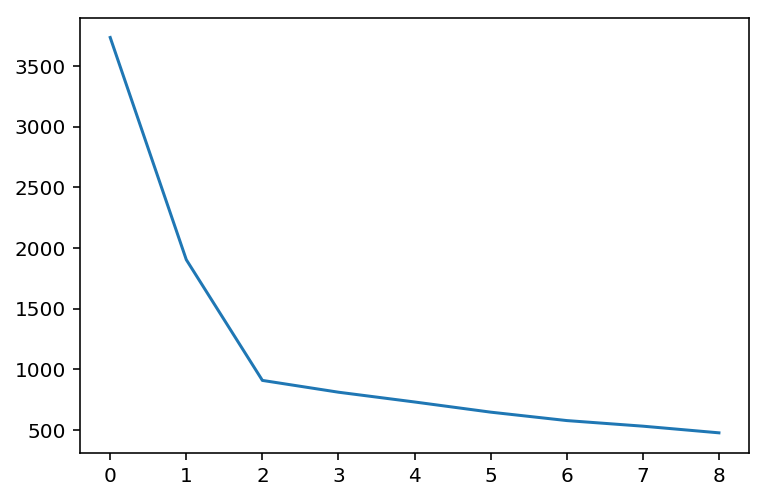

In [201]:
plt.plot(inertias)

In [202]:
line = go.Scatter(
            x = list(range(2, 11)),
            y = inertias,
            mode = 'markers+lines',
            marker = dict(color='white', size=10, line = dict(width=2, color='indianred')),
            line = dict(color='indianred'),
            name = 'Inertia'
)


iplot([line], 'bobo')

In [199]:
mean = X.mean(axis=0)

np.power(np.linalg.norm(X-mean, ord=2, axis=1),2).sum()

15767.55454617228

In [189]:
centroids[0]
mean

array([[-6.20395556, -2.66850162]])

array([-6.20395556, -2.66850162])

In [190]:
inertias[0]

15767.554546172281

In [205]:
data = go.Scatter(
    x = list(range(10)), #list(range(1, len(globalInertia))), 
    y = list(range(10)) ,#globalInertia,
    mode = 'markers+lines',
    marker = dict(color='white', size=10, line = dict(width=2, color='indianred')),
    line = dict(color='indianred'),
    name = 'Inertia')
fig = [data]

iplot(fig, 'fofofo')